<a href="https://colab.research.google.com/github/FrancoLauri/LaboDatos/blob/main/TrabajoClase/03_03_validacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bloque 03 - Unidad 03: Ajuste de Modelos, Validación, Testing y Selección de Características

En esta clase, vamos a aplicar técnicas de ajuste de modelos, validación cruzada, testing y selección de características para optimizar un modelo de **LogisticRegression** usando el conjunto de datos de **Cáncer de Mama Wisconsin**. El objetivo es mejorar la precisión del modelo y entender mejor cuáles son las características más importantes.


## Dividiendo los datos en Train y Test

Es esencial dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento de los modelos de manera precisa. El conjunto de entrenamiento se utiliza para ajustar el modelo, mientras que el conjunto de prueba permite medir su capacidad de generalización. La función `train_test_split` facilita esta tarea, permitiendo dividir los datos de manera sencilla y eficiente.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.figure import Figure
import seaborn as sns
import seaborn.objects as so
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

### Ejemplo con polinomio

Generemos datos con un polinomio de grado 1 $\Big( y(x) = 2x + 1 \Big)$,
dividamos en subconjuntos de entrenamiento (*train*) y prueba (*test*),
y ajustemos con un polinomio de grado 5.

In [ ]:

rng = np.random.default_rng(1)

# Generar datos (polinomio de grado 1)
df = pd.DataFrame({"x": np.arange(14)})
df["y"] = 2 * df["x"] + 1 + rng.normal(size=len(df))

# Features y targets
features = ["x"]
targets = "y"

# Crear modelo (polinomio de grado 5)
model = Pipeline(
    [
        ("polynomial", PolynomialFeatures(degree=5)),
        ("regression", LinearRegression()),
    ]
)

# Dividir en train-test
df_train, df_test = train_test_split(df, train_size=0.5, random_state=1)

# Entrenar modelo
model.fit(df_train[features], df_train[targets])

# Evaluar score
print("Train score:", model.score(df_train[features], df_train[targets]))
print(" Test score:", model.score(df_test[features], df_test[targets]))

Train score: 0.9992270813063544
 Test score: 0.568637337704101


El *score* en el conjunto de entrenamiento es alto,
pero sobreajustó estos datos,
ya que el *score* en el conjunto de prueba es menor.

Gráficamente:

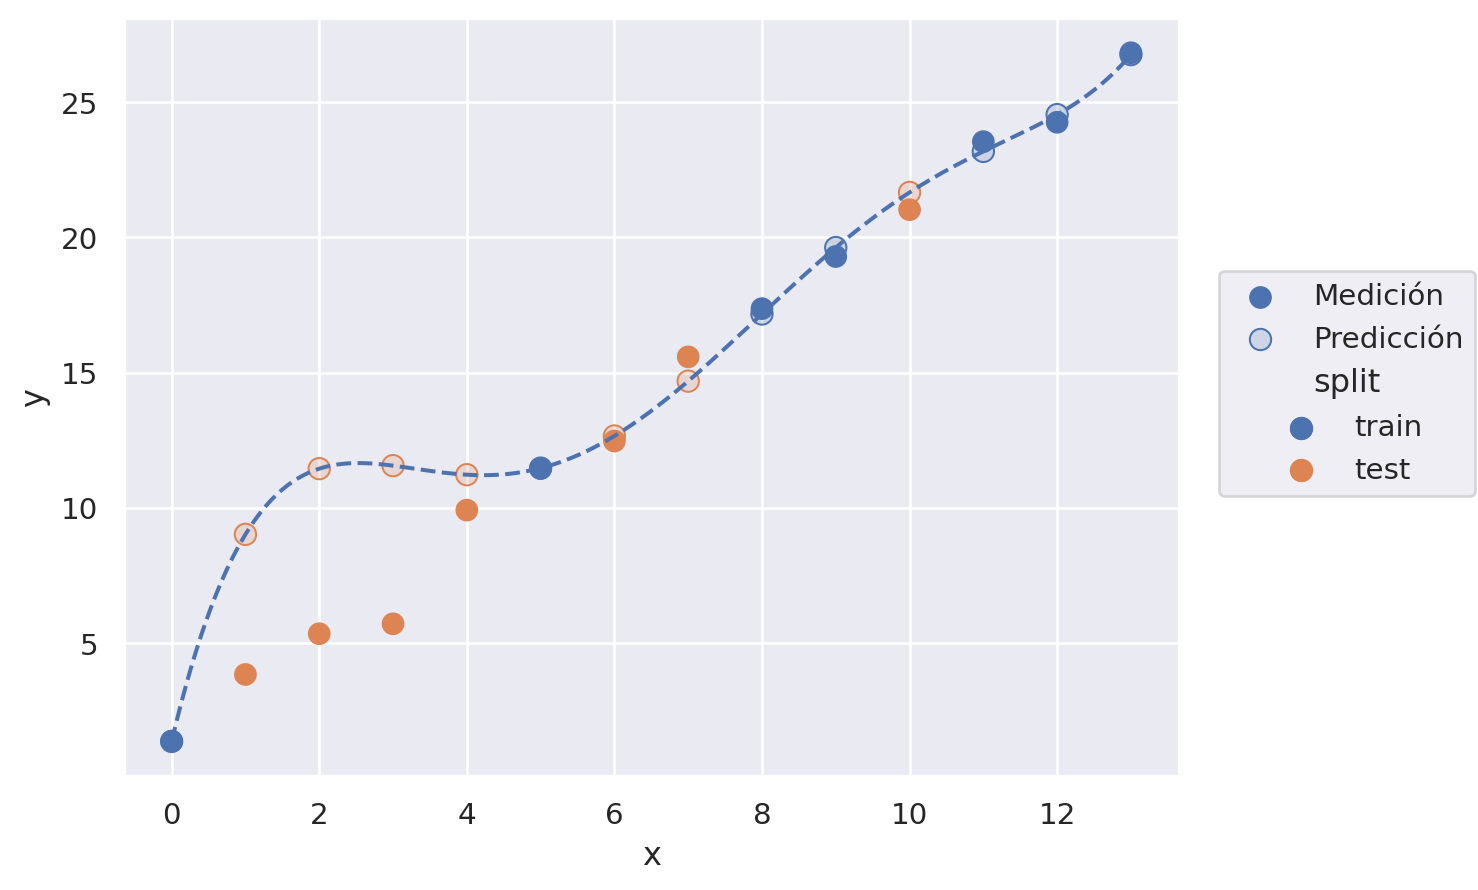

In [ ]:



# Predecir con el modelo
df = pd.concat(
    [
        df_train.assign(split="train"),
        df_test.assign(split="test"),
    ]
)
df["y_pred"] = model.predict(df[features])

# Evaluar modelo en más puntos
df_eval = pd.DataFrame({"x": np.linspace(df["x"].min(), df["x"].max(), 1000)})
df_eval["y"] = model.predict(df_eval)

# Graficar
seaborn.set_theme()
fig = Figure(layout="tight")
axes = fig.add_subplot()
(
    so.Plot(df, x="x", color="split")
    .add(so.Dot(pointsize=8), y="y", label="Medición")
    .add(so.Dots(pointsize=8), y="y_pred", label="Predicción")
    .on(axes)
    .plot()
)
(
    so.Plot(df_eval, x="x", y="y")
    .add(so.Line(linestyle="--"))
    .on(axes)
    .plot()
)

### Dataset de cáncer de mama

In [ ]:


# Cargar dataset
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

# Dividir el conjunto de datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=144
)

# Entrenar el modelo con los datos de entrenamiento
model = LogisticRegression(max_iter=5_000)
model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
print("Precisión del modelo:", model.score(X_test, y_test))

Precisión del modelo: 1.0


In [ ]:
#Inspeccioná el contenido de X_train, X_test, y_train, y_test

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.13880,0.1255,0.06409,0.02500,0.3057,0.07875
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.13690,0.1758,0.13160,0.09140,0.3101,0.07007
453,14.530,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.064950,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.13470,0.1478,0.13730,0.10690,0.2606,0.07810
335,17.060,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.099340,0.1727,0.06071,...,20.99,33.15,143.20,1362.0,0.14490,0.2053,0.39200,0.18270,0.2623,0.07599
477,13.900,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.013390,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.2006,0.13840,0.06222,0.2679,0.07698


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
312,12.760,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.025480,0.1601,0.06140,...,14.190,16.40,92.04,618.8,0.1194,0.2208,0.1769,0.08411,0.2564,0.08253
33,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.075930,0.1853,0.06261,...,24.150,30.90,161.40,1813.0,0.1509,0.6590,0.6091,0.17850,0.3672,0.11230
365,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.077850,0.1618,0.05557,...,24.310,26.37,161.20,1780.0,0.1327,0.2376,0.2702,0.17650,0.2609,0.06735
528,13.940,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.066150,0.1976,0.06457,...,14.620,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.10150,0.2160,0.07253
59,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,...,9.507,15.40,59.90,274.9,0.1733,0.1239,0.1168,0.04419,0.3220,0.09026


,target
467,1
293,1
453,1
335,0
477,1


,target
312,1
33,0
365,0
528,1
59,1


3) no cambia pues esta el parametro random state con valor fijo lo cual me fija la semilla de numeros random


4) depende del valor de test que asignemos, 0.2 osea 20% en este caso, y de la semilla random. dejando la semilla random elije los mismos valores y por ende no cambian los reusltados a vovler a correrlo

**Para hacer:**

1. Lee la documentación de `train_test_split`
2. Inspeccioná el contenido de `X_train`, `X_test`, `y_train`, `y_test`
3. ¿Cambia algo si corrés el código de `train_test_split` otra vez? ¿Por qué?
4. ¿Cómo depende el resultado de los parámetros de `train_test_split`?

## Validación Cruzada

La validación cruzada es una técnica utilizada para evaluar el rendimiento de un modelo de machine learning de manera más robusta y evitar el sobreajuste. En lugar de dividir el conjunto de datos en solo dos partes (entrenamiento y prueba), la validación cruzada divide los datos en varios subconjuntos o "folds". El modelo se entrena en algunos de estos subconjuntos y se valida en los restantes, repitiendo el proceso varias veces. Esto permite obtener una evaluación más precisa del rendimiento general del modelo, al usar todos los datos tanto para entrenamiento como para prueba.

Vamos a aplicar la **validación cruzada** para evaluar el rendimiento del modelo de **LogisticRegression**.

**Para hacer:**
1. Buscá la función `cross_val_score` en la documentación.
2. Aplicá esta validación cruzada a la regresión logística de los datos.
```python
scores = cross_val_score(logreg, X, y, cv=5)
````
3. ¿Que hay en scores?
4. Compará los resultados de la validación cruzada con diferentes valores de `cv` (ej. `cv=3`, `cv=5`, `cv=10`). ¿cómo afecta el valor de `cv` a la estabilidad de la precisión?

In [ ]:
#2) Create a Logistic Regression model
logreg = LogisticRegression(max_iter=5000)

# Apply cross-validation
scores = cross_val_score(logreg, X, y, cv=5)

# Print the scores
print("Scores de validación cruzada:", scores)
print("Precisión media:", scores.mean())

Scores de validación cruzada: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Precisión media: 0.9507995652848935


3) son las puntuaciones de evaluacion del modelo para distintos folds

4)ademas de los scores calcule la mean de los mismos, para distintos valores de cv y el resultado de la mean es practicamente el mismo, con diferenicas infimas. se observa que a un cv mayor es mas probable que alguno de los folds tenga un peor score, aunque igualmente otro fold de la misma tanda compensa por eso mismo la media casi no fluctua


**Para leer en casa**: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

## Ajuste de Hiperparámetros

Los hiperparámetros de un modelo son valores configurables que determinan cómo el modelo se entrena y se ajusta a los datos. A diferencia de los parámetros, que se aprenden durante el entrenamiento, los hiperparámetros deben definirse antes del proceso de aprendizaje y afectan el rendimiento final del modelo.

**Para hacer:**

1. Buscá en la documentación cuáles son los hiperparámetros de **LogisticRegression** y que hace cada uno.
2. Usá `train_test_split` para partir los datos.
3. Buscá en la documentación `GridSearchCV` y usalo para optimizar los hiper parametros `C`, `penalty` y `solver`:
```python
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'penalty': ['l1', 'l2'],       # Penalización L1 o L2
    'solver': ['liblinear']        # Solver compatible con L1 y L2
}
```
4. ¿Cuál es el mejor conjunto de hiperparámetro?
5. ¿Cómo da la matriz de confusión para este modelo?
6. Evaluá el rendimiento del modelo ajustado en el conjunto de prueba y compará los resultados con el modelo base (sin ajuste de hiperparámetros).

In [ ]:
#2) idem codigo del cancer de mama

In [ ]:
#3 y 4)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'penalty': ['l1', 'l2'],       # Penalización L1 o L2
    'solver': ['liblinear']        # Solver compatible con L1 y L2
}

logreg = LogisticRegression(max_iter=5000)

grid_search = GridSearchCV(logreg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Mejores hiperparámetros: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntuación de validación cruzada: 0.9494505494505494


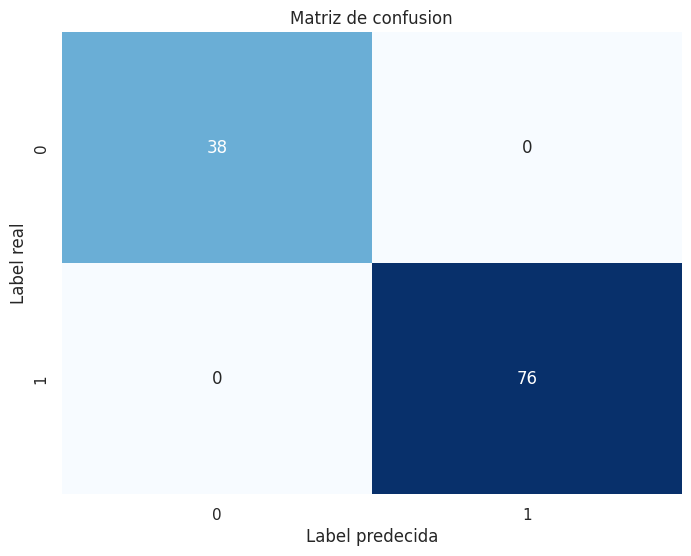

In [ ]:
#5)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Label predecida')
plt.ylabel('Label real')
plt.title('Matriz de confusion')
plt.show()

In [ ]:
#6)
best_model_score = best_model.score(X_test, y_test)
print(f"Precisión del modelo ajustado (GridSearchCV) en el conjunto de prueba: {best_model_score}")

base_model_score = model.score(X_test, y_test)
print(f"Precisión del modelo base (sin ajuste) en el conjunto de prueba: {base_model_score}")

if best_model_score > base_model_score:
    print("\nEl modelo ajustado con GridSearchCV tuvo un mejor rendimiento en el conjunto de prueba.")
elif best_model_score < base_model_score:
    print("\nEl modelo base tuvo un mejor rendimiento en el conjunto de prueba.")
else:
    print("\nAmbos modelos tuvieron un rendimiento similar en el conjunto de prueba.")

Precisión del modelo ajustado (GridSearchCV) en el conjunto de prueba: 1.0
Precisión del modelo base (sin ajuste) en el conjunto de prueba: 1.0

Ambos modelos tuvieron un rendimiento similar en el conjunto de prueba.


**Para buscar en casa**: Hay otros métodos de optimización de hiperparámetros como `RandomizedSearchCV`. Buscá en la documentación la diferencia. Tambien hay otros como métodos bayesianos, buscá aca: https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f

## Selección de Características

La selección de características es una técnica utilizada en machine learning para identificar y conservar solo las variables más relevantes de un conjunto de datos. Al reducir el número de características innecesarias o redundantes, se mejora la eficiencia del modelo y se evita el sobreajuste, haciendo que el modelo sea más fácil de interpretar y a menudo más preciso. Esto también ayuda a reducir el tiempo de procesamiento y los recursos computacionales necesarios.

Vamos a aplicar **Recursive Feature Elimination (RFE)** para seleccionar las características más importantes para el modelo de **LogisticRegression**.

In [ ]:
from sklearn.feature_selection import RFE


# Aplicar RFE para seleccionar las mejores características
selector = RFE(model, n_features_to_select=5)
selector.fit(X, y)

# Mostrar las características seleccionadas
print(f"Características seleccionadas: {selector.support_}")
print(f"Ranking de las características: {selector.ranking_}")

Características seleccionadas: [ True False False False False False False False False False False  True
 False False False False False False False False  True False False False
 False  True  True False False False]
Ranking de las características: [ 1 12 18 25 11  5  4  7  9 20 17  1  8 14 23 16 22 21 19 24  1 10 13 26
  6  1  1  2  3 15]


**Para hacer:**

1. ¿Cuáles fueron las características seleccionadas con RFE?
2. Evaluá cómo cambia el rendimiento del modelo al reducir el número de características
3. Visualizá las características seleccionas vs. las demás.

In [ ]:
#1)
selector = RFE(model, n_features_to_select=5)
selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Características seleccionadas con RFE:", selected_features.tolist())

Características seleccionadas con RFE: ['mean radius', 'texture error', 'worst radius', 'worst compactness', 'worst concavity']


In [ ]:
#2)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected = LogisticRegression(max_iter=5000)
model_selected.fit(X_train_selected, y_train)

score_selected = model_selected.score(X_test_selected, y_test)
print(f"Precisión del modelo con características seleccionadas: {score_selected}")

Precisión del modelo con características seleccionadas: 0.9912280701754386


In [ ]:
#3)
all_features = X.columns.tolist()
selected_features = X.columns[selector.support_].tolist()
non_selected_features = [feat for feat in all_features if feat not in selected_features]

df_plot = X.copy()
df_plot['target'] = y

## Para seguir leyendo:

- https://pmc.ncbi.nlm.nih.gov/articles/PMC9398810/
- https://medium.com/@shashmikaranam/exploratory-data-analysis-breast-cancer-wisconsin-diagnostic-dataset-6a3be9525cd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# Load the dataset (assuming X and y are already loaded from previous cells)
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

# Create a Logistic Regression model (using the base model for RFE)
model = LogisticRegression(max_iter=5000)

# Apply RFE to select the best features (using the same parameters as before)
selector = RFE(model, n_features_to_select=5)
selector.fit(X, y)

# Get the list of all features and selected features
all_features = X.columns.tolist()
selected_features = X.columns[selector.support_].tolist()
non_selected_features = [feat for feat in all_features if feat not in selected_features]

# Combine features and target for plotting
df_plot = X.copy()
df_plot['target'] = y

# Convert target to categorical for plotting
df_plot['target'] = df_plot['target'].map({0: 'Maligno', 1: 'Benigno'})

# Plot selected features
print("Visualización de Características Seleccionadas:")
n_selected = len(selected_features)
n_cols = 3  # Adjust the number of columns as needed
n_rows = (n_selected + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() # Flatten in case of single row/column

for i, feature in enumerate(selected_features):
    sns.boxplot(x='target', y=feature, data=df_plot, ax=axes[i])
    axes[i].set_title(f'Distribución de {feature}')
    axes[i].set_xlabel('Tipo de Tumor')
    axes[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot non-selected features (optional, can be many)
print("\nVisualización de Características No Seleccionadas:")
n_non_selected = len(non_selected_features)
n_rows_non_selected = (n_non_selected + n_cols - 1) // n_cols

if n_non_selected > 0:
    fig_non_selected, axes_non_selected = plt.subplots(n_rows_non_selected, n_cols, figsize=(5 * n_cols, 4 * n_rows_non_selected))
    axes_non_selected = axes_non_selected.flatten()

    for i, feature in enumerate(non_selected_features):
        sns.boxplot(x='target', y=feature, data=df_plot, ax=axes_non_selected[i])
        axes_non_selected[i].set_title(f'Distribución de {feature}')
        axes_non_selected[i].set_xlabel('Tipo de Tumor')
        axes_non_selected[i].set_ylabel(feature)

    # Hide any unused subplots
    for j in range(i + 1, len(axes_non_selected)):
        fig_non_selected.delaxes(axes_non_selected[j])

    plt.tight_layout()
    plt.show()
else:
    print("No hay características no seleccionadas para visualizar.")